For this analysis and research proposal, I'll be looking into the recently released data on Russian-linked Facebook ads, purchased by the Internet Research Agency (IRA) and identified by Facebook, during the 2016 presidential campaign. These ads and their corresponding data were published by Democrats on the House Permanent Select Committee on Intelligence (HPSCI). The reasoning behind this release according to the minority committee members was, "As part of that continuing effort to educate the public and seek additional analysis, the Committee Minority is making available all IRA advertisements identified by Facebook". This is a very interesting data set so let's see what types of questions and potential experiments can be derived from it. 

In [1]:
# Importing necessary modules for data and visual analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
# Reading in the data set
fbook = pd.read_csv('FacebookAds.csv')

In [3]:
# Taking a first look at the data, its column info and types of data recorded
fbook.head()

,AdID,AdText,Impressions,Age,Clicks,CreationDate,EndDate,Location,Behaviors,Placements,...,Language,FriendsOfConnections,ExcludedConnections,Gender,Generation,Politics,AdSpend,AdSpendCurrency,SourceFile,SourceZip
0,374,Join us because we care. Black matters.,137.0,18 - 65+,0.0,06/10/15 02:59:53 AM PDT,NaN,United States: Baltimore (+20 km) Maryland; St...,NaN,News Feed on desktop computers or News Feed on...,...,English (UK) or English (US),NaN,Exclude people who like Black Matters,NaN,NaN,NaN,44.87,RUB,/2015-06/P(1)0000054.pdf,2015-q2.zip
1,655,NOT EVERY BOY WANTS TO BE A SOLDIER. A beautif...,452.0,18 - 65+,35.0,06/23/15 07:04:01 AM PDT,06/24/15 07:04:00 AM PDT,Living In: United States,NaN,News Feed on desktop computers or News Feed on...,...,NaN,Friends of people who are connected to LGBT Un...,NaN,NaN,NaN,NaN,184.81,RUB,/2015-06/P(1)0000180.pdf,2015-q2.zip
2,664,"""People can tolerate two homosexuals they see ...",37.0,18 - 65+,4.0,06/23/15 07:02:40 AM PDT,06/24/15 07:02:39 AM PDT,Living In: United States,NaN,News Feed on desktop computers or News Feed on...,...,NaN,Friends of people who are connected to LGBT Un...,NaN,NaN,NaN,NaN,99.95,RUB,/2015-06/P(1)0000182.pdf,2015-q2.zip
3,79,?????? ??? ????? ? ??????????,31.0,18 - 65+,0.0,06/09/15 03:50:21 AM PDT,06/11/15 03:48:00 AM PDT,United States,NaN,"News Feed on desktop computers, News Feed on m...",...,English (UK) or English (US),NaN,Exclude people who like L for life,NaN,NaN,NaN,33.59,RUB,/2015-06/P(1)0001844.pdf,2015-q2.zip
4,325,California... knows how to party California......,326.0,18 - 65+,4.0,06/10/15 07:34:52 AM PDT,06/11/15 07:34:51 AM PDT,"United States: Baltimore Maryland; Ferguson, S...",NaN,News Feed on desktop computers or News Feed on...,...,NaN,NaN,NaN,NaN,NaN,NaN,45.94,RUB,/2015-06/P(1)0002111.pdf,2015-q2.zip


Taking a look at the dataset, we have a wide range of info for each ad including the ad text, number of views(impressions), targeted age ranges, clicks, creation and end dates, etc. Now that we have a sense of the breadth of the data, consisting of continuous and categorical data, just how much data,  a.k.a. how many ads, do we have to explore? 

In [4]:
# To get a better sense of the amount of data we're working with, examine the shape of the dataframe
fbook.shape

(3516, 22)

It appears we have data for roughly 3,500 ads purchased by the Russia-based IRA, with 22 columns describing specific aspects of each ad. A better understanding of this data will require a bit more exploration which I would like to focus on how broad a target were these ads aimed at, what potential impacts these ads had, how much money was spent on these ads and how might these variables be correlated?

In [5]:
# For cleaner viz, set visualization to default Seaborn parameters
sns.set()

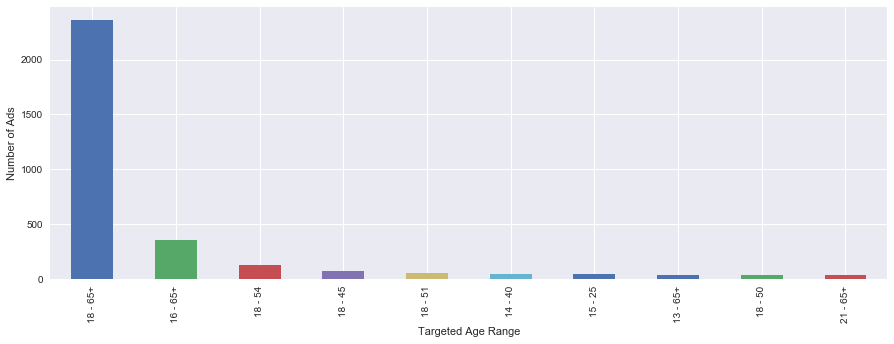

In [6]:
# Examining the age ranges targeted by the Russian-linked ads
fbook.Age.value_counts().head(10).plot(kind='bar', figsize=(15,5))
plt.xlabel('Targeted Age Range')
plt.ylabel('Number of Ads')
plt.show()

Taking a look at how the ads were targeted by age, it appears almost all of the ads were aimed at the widest range of possible ages. So the age of Facebook users is not what drove the targeting of the ads. Since we have a column for gender, let's see if there was a gendered aspect to how these ads were placed. 

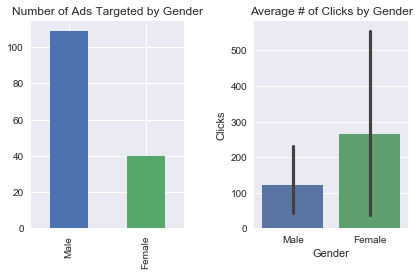

In [7]:
plt.subplot(1,2,1)
fbook['Gender'].value_counts().plot(kind='bar')
plt.title("Number of Ads Targeted by Gender")

plt.subplot(1,2,2)
sns.barplot(x='Gender', y='Clicks', data=fbook)
plt.title('Average # of Clicks by Gender')
plt.tight_layout()

plt.show()

From these plots, we can see that a relatively small number of ads were targeted by gender, yet more than double the ads were targeted at males with over 100 while only 40 were targeted at females. However, when looking at the average number of clicks generated by each group, female-targeted ads have more than double the average clicks that male targeted ads received. This split could help inform our potential research based on this data. When designing my experiment, I will definitely take this disparity by gender into account.   

In [8]:
fbook[['Clicks', 'Gender']].dropna().groupby('Gender').describe()

Clicks                                                     
        count        mean         std  min  25%  50%   75%     max
Gender                                                            
Female   40.0  264.150000  828.877200  0.0  0.0  0.0  1.25  3501.0
Male    108.0  122.518519  483.315951  0.0  0.0  0.0  0.00  3160.0

My next area of inquiry is where were these ads placed? Were they focused on one particular platform or more broadly targeted?

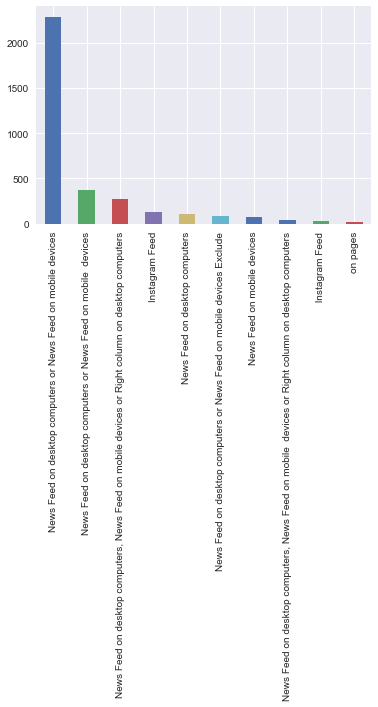

In [9]:
sns.set()
fbook.Placements.value_counts().head(10).plot(kind='bar')
plt.show()

While ads appear to have been place across several different aspects of the Facebook platform, the vast majority were placed in the News Feed on both desktop and mobile devices, and not particularly limited to one or the other. Nor were they targeted at specific pages that users were affiliated with. 

So we know these ads were targeted at the widest potential audience, but how much money was spent and did that make an correspond to an increased number of clicks? 

In [20]:
fbook.AdSpend.dropna().describe()

count      2470.000000
mean       1986.613239
std        9866.765272
min           0.050000
25%         133.162500
50%         300.000000
75%         680.177500
max      331675.750000
Name: AdSpend, dtype: float64

In [21]:
print('Total Ad Spend: ', fbook.AdSpend.sum())

Total Ad Spend:  4906934.700000001


The data shows ad spend varied quite significantly with the least being spent a mere \$0.05 and max of \$331,676, averaging out to around \$300 per ad. The total spent on the ads amounted to \$4,906,935. So how did this money perform in terms of clicks?

In [42]:
# Extract the top performing ads in terms of clicks and their corresponding Ad Spend
fbook[['Clicks', 'AdSpend']].dropna().sort_values(by='Clicks', ascending=False).head(15)

,Clicks,AdSpend
1814,4303896.0,2.69
2055,73063.0,110587.67
74,72043.0,331675.75
2414,56405.0,59571.41
3142,49197.0,1500.00
2058,40134.0,78357.33
2436,33444.0,58193.59
3249,28137.0,89081.11
3332,26964.0,200.00
2482,26179.0,523.00


Examining the data in terms of clicks by ad spend, we can see that larger ad spends doesn't necessarily mean a higher click count. The highest performance in clicks only had an ad spend of \$2.69 while the next highest performance by clicks had an ad spend of roughly \$110,587. Let's look at this graphically to get a sense of performance by ad spend and examine the correlation between these 2 variables. 

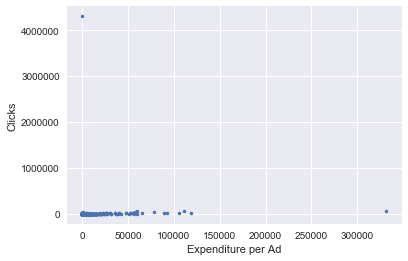

In [30]:
# Plot the relationship between Ad Spend and Clicks
plt.plot('AdSpend', 'Clicks', data=fbook, marker='.', linestyle='none')
plt.xlabel('Expenditure per Ad')
plt.ylabel('Clicks')
plt.show()

As for any correlation between the 2 variables, I'd like to see what sort of t-value and p-value exist for these variables. If our null hypothesis is that the two variables are uncorrelated, we can expect a p-value greater than 0.05, elsewise we can begin to explore the relationship between these variables more.

In [17]:
stats.ttest_ind(fbook['Clicks'].dropna(), fbook['AdSpend'].dropna())

Ttest_indResult(statistic=0.09721293593602563, pvalue=0.9225605839241373)

When viewing these variables graphically, we see that no matter the expenditure on the ad it has no major impact on clicks. So what could account for a higher click rate other than ad spend? The next logical place to look is the ad text itself. 

In [41]:
fbook[['AdID', 'AdText','Clicks']].sort_values(by='Clicks', ascending=False).head(10)

,AdID,AdText,Clicks
1814,2292,Your help is needed. This case is a classic ex...,4303896.0
2055,2751,Community of people who support our brave Poli...,73063.0
74,450,United We Stand! Welcome every patriot we can ...,72043.0
2414,2647,"Brown Power is a platform designed to educate,...",56405.0
3142,1033,This video may bring tears to your eyes. Make ...,49197.0
2058,2774,"Heritage, not hate. The South will rise again!...",40134.0
2436,3145,"Staying Woke, building-up our communities, upl...",33444.0
3249,2885,Together we are a shining beacon of faithfulne...,28137.0
3332,1131,repost,26964.0
2482,955,This hairdresser from Atlanta is amazing. She ...,26179.0


In [40]:
# Looking at the full text of the highest performing ad
fbook.iloc[1814, 1]

'Your help is needed. This case is a classic example of racial profiling in the system which has cost innocent Jerome Smith 31 years of his life already and can cost even more. Jerome must be brought home. No one pays attention to him, no one fights for his life. Let us help this man achieve justice! Please sign the petition. https://www.facebook. com/Save-I nnocent-Man-Jerome-Skee-Smith-From-Life- I m prison  ent- 109065791 4303896/?sk=a pp_1 903225443331 96&ref=s'

After looking closer at the highest performing ad text, we get a sense of what kind of ad text would be the most impactful on Facebook users. This will help formulate the rest of our research proposal and what kinds of wording to use if we wanted to create a potentially high performing ad. 

   ### Research Proposal

Based on the prior analysis, the question I want to focus on is: What ads used by Russian trolls are most effective? Assuming that more clicks is an indicator of the effectiveness of the ad text, this seems a good measure for determining how large an influence the ad is having. With what we can see from this data set, the most impactful ad, by nearly 2 orders of magnitude, talks about justice for an innocent black man who has been racially profiled. I'm interested in this question because it seems useful to understand what sorts of tactics Russian trolls have taken and are likely to take in the future. This dataset gives us a reasonable set of cues to look for when trying to identify and try to remove or at least make users aware of their existence to protect US elections from outside influence. 

However, if I were attempting to replicate the most effective Russian troll ad, I would use the same ad text from this ad for my control, and my test would be to change the gender of the innocent person in the ad text. This is based on my hypothesis that a black female in the content of the ad will illicit more clicks than that of a black man, amongst targeted female Facebook users. The click rate would be my variable of interest, while also monitoring the number of impressions (or views) the ad recieved.  

Implementing this test will involve using the same amount of money on the ad spend, same placements, and same run time to ensure any impact from the new ad text is measurable. Given these baselines, rollout between the 2 ad versions will occur at the same time, targeted at equally sized populations. The ads will be randomly assigned to avoid any selection bias and measurements will be taken at the end of the 2 day period of the experiment. 

If the performance of the new ad text exceeds that of the original ad by more than 25%, measured in clicks, that will become the only ad implemented. Otherwise, the original ad text will continue to be used. 